<a href="https://colab.research.google.com/github/viniventur/Exercicio-Econometrico/blob/main/Exe_Econometrico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício Econométrico - AB1 - Econometria 2
## Por: [Vinícius Ventura](https://github.com/viniventur/)

Outputs obtidos nas questões 1 e 2, no Stata e no R, respectivamente.

[Link para o trabalho no RPubs](https://rpubs.com/viniventur/exereconometrico)  
[Link para o trabalho em PDF](https://drive.google.com/file/d/1wpCHi7G7eGQHdqIBc8QqL-ZvULlXTNkD/view?usp=share_link)

# Questão 1

## Questão 1 Letra a)

### Importando os pacotes principais

In [1]:
# Pacotes de gerenciamento do sistema operacional, como manipulação de arquivos e diretórios, gerenciamento de processos, obtenção de informações do sistema, etc.
import os
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

# Pacotes para manipulação e tratamento de dados
import numpy as np
import pandas as pd

# Pacotes para análise gráfica
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# Pacotes para análise econométrica
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

### Importando os dados com o pacote wooldridge

In [2]:
!pip install wooldridge

import wooldridge
df = wooldridge.data('fertil2')
df

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 9.8 MB/s eta 0:00:00


,mnthborn,yearborn,age,electric,radio,tv,bicycle,educ,ceb,agefbrth,...,heduc,agesq,urban,urb_educ,spirit,protest,catholic,frsthalf,educ0,evermarr
0,5,64,24,1.0,1.0,1.0,1.0,12,0,NaN,...,NaN,576,1,12,0,0,0,1,0,0
1,1,56,32,1.0,1.0,1.0,1.0,13,3,25.0,...,12.0,1024,1,13,0,0,0,1,0,1
2,7,58,30,1.0,0.0,0.0,0.0,5,1,27.0,...,7.0,900,1,5,1,0,0,0,0,1
3,11,45,42,1.0,0.0,1.0,0.0,4,3,17.0,...,11.0,1764,1,4,0,0,0,0,0,1
4,5,45,43,1.0,1.0,1.0,1.0,11,2,24.0,...,14.0,1849,1,11,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,6,72,16,0.0,1.0,0.0,0.0,7,0,NaN,...,NaN,256,0,0,0,1,0,1,0,0
4357,1,60,28,0.0,1.0,0.0,0.0,7,2,19.0,...,NaN,784,0,0,0,1,0,1,0,0
4358,11,63,24,0.0,1.0,0.0,0.0,5,4,13.0,...,NaN,576,0,0,0,1,0,0,0,0
4359,1,62,26,0.0,1.0,0.0,0.0,0,1,25.0,...,7.0,676,0,0,1,0,0,1,1,1


### Manipulação dos dados

In [3]:
df = pd.DataFrame(df)
df

,mnthborn,yearborn,age,electric,radio,tv,bicycle,educ,ceb,agefbrth,...,heduc,agesq,urban,urb_educ,spirit,protest,catholic,frsthalf,educ0,evermarr
0,5,64,24,1.0,1.0,1.0,1.0,12,0,NaN,...,NaN,576,1,12,0,0,0,1,0,0
1,1,56,32,1.0,1.0,1.0,1.0,13,3,25.0,...,12.0,1024,1,13,0,0,0,1,0,1
2,7,58,30,1.0,0.0,0.0,0.0,5,1,27.0,...,7.0,900,1,5,1,0,0,0,0,1
3,11,45,42,1.0,0.0,1.0,0.0,4,3,17.0,...,11.0,1764,1,4,0,0,0,0,0,1
4,5,45,43,1.0,1.0,1.0,1.0,11,2,24.0,...,14.0,1849,1,11,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,6,72,16,0.0,1.0,0.0,0.0,7,0,NaN,...,NaN,256,0,0,0,1,0,1,0,0
4357,1,60,28,0.0,1.0,0.0,0.0,7,2,19.0,...,NaN,784,0,0,0,1,0,1,0,0
4358,11,63,24,0.0,1.0,0.0,0.0,5,4,13.0,...,NaN,576,0,0,0,1,0,0,0,0
4359,1,62,26,0.0,1.0,0.0,0.0,0,1,25.0,...,7.0,676,0,0,1,0,0,1,1,1


In [4]:
# Excluindo variáveis que não serão utilizadas

variaveis = ['children', 'age', 'agesq', 'educ', 'electric', 'urban']

df = df.drop(columns=df.columns.difference(variaveis))
df

,age,electric,educ,children,agesq,urban
0,24,1.0,12,0,576,1
1,32,1.0,13,3,1024,1
2,30,1.0,5,1,900,1
3,42,1.0,4,2,1764,1
4,43,1.0,11,2,1849,1
...,...,...,...,...,...,...
4356,16,0.0,7,0,256,0
4357,28,0.0,7,2,784,0
4358,24,0.0,5,3,576,0
4359,26,0.0,0,1,676,0


In [5]:
# Renomeando variáveis

df = df.rename(columns={'children': 'cria' ,'electric': 'elet' ,'urban': 'urb'})
df

,age,elet,educ,cria,agesq,urb
0,24,1.0,12,0,576,1
1,32,1.0,13,3,1024,1
2,30,1.0,5,1,900,1
3,42,1.0,4,2,1764,1
4,43,1.0,11,2,1849,1
...,...,...,...,...,...,...
4356,16,0.0,7,0,256,0
4357,28,0.0,7,2,784,0
4358,24,0.0,5,3,576,0
4359,26,0.0,0,1,676,0


In [6]:
# Reorganização do dataframe

df = df[['cria', 'age', 'agesq', 'educ', 'elet', 'urb']]
df

,cria,age,agesq,educ,elet,urb
0,0,24,576,12,1.0,1
1,3,32,1024,13,1.0,1
2,1,30,900,5,1.0,1
3,2,42,1764,4,1.0,1
4,2,43,1849,11,1.0,1
...,...,...,...,...,...,...
4356,0,16,256,7,0.0,0
4357,2,28,784,7,0.0,0
4358,3,24,576,5,0.0,0
4359,1,26,676,0,0.0,0


### Regressão

In [7]:
# Resolvendo o BO com a variável elet que aparentemente tinha valores infinitos e/ou NAs
df.replace([np.inf, -np.inf], np.nan, inplace=True) #substitui infinitos por na
df.dropna(inplace=True)
df

,cria,age,agesq,educ,elet,urb
0,0,24,576,12,1.0,1
1,3,32,1024,13,1.0,1
2,1,30,900,5,1.0,1
3,2,42,1764,4,1.0,1
4,2,43,1849,11,1.0,1
...,...,...,...,...,...,...
4356,0,16,256,7,0.0,0
4357,2,28,784,7,0.0,0
4358,3,24,576,5,0.0,0
4359,1,26,676,0,0.0,0


In [8]:
# variáveis
y = df.cria
x = df[['age', 'agesq', 'educ', 'elet', 'urb']]
x = sm.add_constant(x)

In [9]:
# 1º regressão
reg = sm.OLS(y, x).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   cria   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     1170.
Date:                Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                        05:14:15   Log-Likelihood:                -7806.3
No. Observations:                4358   AIC:                         1.562e+04
Df Residuals:                    4352   BIC:                         1.566e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2225      0.240    -17.580      0.0

In [10]:
# print em csv para exportar para o excel
print(reg.summary().as_csv())

                      OLS Regression Results                      
Dep. Variable:   ,cria            ,  R-squared:         ,   0.573 
Model:           ,OLS             ,  Adj. R-squared:    ,   0.573 
Method:          ,Least Squares   ,  F-statistic:       ,   1170. 
Date:            ,Sun, 11 Jun 2023,  Prob (F-statistic):,  0.00   
Time:            ,05:14:15        ,  Log-Likelihood:    , -7806.3 
No. Observations:,  4358          ,  AIC:               ,1.562e+04
Df Residuals:    ,  4352          ,  BIC:               ,1.566e+04
Df Model:        ,     5          ,                     ,         
Covariance Type: ,nonrobust       ,                     ,         
     ,   coef   , std err ,    t    ,P>|t| ,  [0.025 ,  0.975] 
const,   -4.2225,    0.240,  -17.580, 0.000,   -4.693,   -3.752
age  ,    0.3409,    0.017,   20.652, 0.000,    0.309,    0.373
agesq,   -0.0027,    0.000,  -10.086, 0.000,   -0.003,   -0.002
educ ,   -0.0752,    0.006,  -11.948, 0.000,   -0.088,   -0.063
elet ,   -

## Questão 1 letra b)

### Correlação

In [11]:
# Analisando correlação entre as variáveis

matrizcor = df.corr()
matrizcor.round(2)

,cria,age,agesq,educ,elet,urb
cria,1.00,0.73,0.71,-0.37,-0.07,-0.13
age,0.73,1.00,0.99,-0.31,0.04,-0.07
agesq,0.71,0.99,1.00,-0.31,0.04,-0.08
educ,-0.37,-0.31,-0.31,1.00,0.30,0.23
elet,-0.07,0.04,0.04,0.30,1.00,0.28
urb,-0.13,-0.07,-0.08,0.23,0.28,1.00


<Axes: >

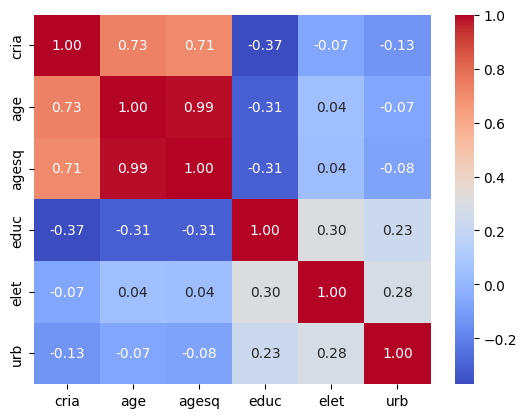

In [12]:
sns.heatmap(matrizcor, annot = True, cmap='coolwarm', fmt='.2f')

### FIV

In [13]:
# criando classe para o VIF para fazer a tabela mais facilmente
from statsmodels.stats.outliers_influence import variance_inflation_factor

class VIF:
    def __init__(self, data):
        self.data = data
        self.viftab = None

# Estava referenciando a variável no segundo argumento quinta kk, por isso deu erro

    def vif(self):
        viftab = []
        for i, col in enumerate(self.data.columns):
            vif = variance_inflation_factor(self.data.values, i)
            viftab.append((col, vif))
        viftab = pd.DataFrame(viftab)
        viftab = viftab.drop(0, axis=0)
        viftab = viftab.rename(columns={0: 'Variável', 1: 'VIF'})
        vif_mean = viftab['VIF'].mean()
        viftab = viftab.append({'Variável': 'Média', 'VIF': vif_mean}, ignore_index=True)
        self.viftab = viftab

In [14]:
vif = VIF(x)
vif.vif()
vif1 = pd.DataFrame(vif.viftab)
vif1.round(2)

,Variável,VIF
0,age,42.48
1,agesq,42.38
2,educ,1.26
3,elet,1.19
4,urb,1.12
5,Média,17.69


### Regressão sem o _agesq_

In [15]:
# redefinindo variáveis
y = df.cria
x2 = df[['age', 'educ', 'elet', 'urb']]
x2 = sm.add_constant(x2) 
x2

,const,age,educ,elet,urb
0,1.0,24,12,1.0,1
1,1.0,32,13,1.0,1
2,1.0,30,5,1.0,1
3,1.0,42,4,1.0,1
4,1.0,43,11,1.0,1
...,...,...,...,...,...
4356,1.0,16,7,0.0,0
4357,1.0,28,7,0.0,0
4358,1.0,24,5,0.0,0
4359,1.0,26,0,0.0,0


In [16]:
# regressão nova
reg2 = sm.OLS(y, x2).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                   cria   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     1404.
Date:                Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                        05:14:16   Log-Likelihood:                -7856.6
No. Observations:                4358   AIC:                         1.572e+04
Df Residuals:                    4353   BIC:                         1.576e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9997      0.097    -20.698      0.0

In [17]:
# Novo VIF

vif2 = VIF(x2)
vif2.vif()
vif2 = pd.DataFrame(vif2.viftab)
vif2.round(2)

,Variável,VIF
0,age,1.13
1,educ,1.26
2,elet,1.19
3,urb,1.11
4,Média,1.17


In [18]:
# Comparando os modelos

from statsmodels.iolib.summary2 import summary_col

table = summary_col([reg, reg2], stars=True, float_format='%.2f',
                     model_names=['COM agesq', 'SEM agesq'],
                     info_dict={'R-squared': lambda x: "{:.2f}".format(x.rsquared)})
print(table)


               COM agesq SEM agesq
----------------------------------
R-squared      0.57      0.56     
R-squared Adj. 0.57      0.56     
age            0.34***   0.18***  
               (0.02)    (0.00)   
agesq          -0.00***           
               (0.00)             
const          -4.22***  -2.00*** 
               (0.24)    (0.10)   
educ           -0.08***  -0.08*** 
               (0.01)    (0.01)   
elet           -0.31***  -0.30*** 
               (0.07)    (0.07)   
urb            -0.20***  -0.17*** 
               (0.05)    (0.05)   
R-squared      0.57      0.56     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


## Questão 1 letra c)

In [19]:
# Pacote
import statsmodels.stats.diagnostic as smd

### Teste Breusch-Pagan - Heterocedasticidade

In [20]:
# Teste BP
bptest = smd.het_breuschpagan(resid=reg2.resid, exog_het=x2)
bphet = pd.DataFrame({'lm': [bptest[0]], 'lm_valorp:': [bptest[1]]})
bphet

,lm,lm_valorp:
0,1041.464351,3.684149e-224


### Teste White - Heterocedasticidade

In [21]:
# Teste White
whitetest = smd.het_white(resid=reg2.resid, exog=x2)
white = pd.DataFrame({'lm': [whitetest[0]], 'lm_valorp:': [whitetest[1]]})
white

,lm,lm_valorp:
0,1124.687371,2.831002e-233


### Corrigindo a heterocedasticidade

In [22]:
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                   cria   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     1404.
Date:                Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                        05:14:16   Log-Likelihood:                -7856.6
No. Observations:                4358   AIC:                         1.572e+04
Df Residuals:                    4353   BIC:                         1.576e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9997      0.097    -20.698      0.0

In [23]:
# Regressão com robust
reg3 = reg2.get_robustcov_results(cov_type='HC1', use_t=None)
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                   cria   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     759.4
Date:                Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                        05:14:16   Log-Likelihood:                -7856.6
No. Observations:                4358   AIC:                         1.572e+04
Df Residuals:                    4353   BIC:                         1.576e+04
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9997      0.095    -21.066      0.0

# Questão 2

## Questão 2 letra a) Importando dados

In [24]:
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
# importando o arquivo

dfq2 = pd.read_excel("/content/drive/MyDrive/Atividades keuler python/Atividade AB1/data_prova.xls")
dfq2

,ano,uf,codmun,munic,analf,pobre,rpc,agua,lixo,esgag_inad,poprur,poptot,popurb
0,2000,11,1100015,ALTA FLORESTA D'OESTE,15.84,35.59,371.15,57.13,70.33,27.52,14192,26533,12341
1,2000,11,1100023,ARIQUEMES,11.77,21.55,530.87,73.54,90.61,21.14,19385,74503,55118
2,2000,11,1100031,CABIXI,17.50,36.47,342.46,58.61,76.57,27.36,4846,7518,2672
3,2000,11,1100049,CACOAL,12.14,25.25,456.63,78.60,90.22,14.28,22170,73568,51398
4,2000,11,1100056,CEREJEIRAS,13.90,33.57,511.47,73.98,70.04,24.82,3361,18207,14846
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,2010,52,5222005,VIANÓPOLIS,7.97,5.85,664.33,86.89,99.32,0.38,3378,12548,9170
11126,2010,52,5222054,VICENTINÓPOLIS,12.68,6.62,651.07,98.60,98.78,9.04,1050,7371,6321
11127,2010,52,5222203,VILA BOA,15.88,23.61,376.72,85.25,99.21,1.98,1233,4735,3502
11128,2010,52,5222302,VILA PROPÍCIO,19.25,19.77,401.84,77.94,100.00,6.63,3641,5145,1504


### Filtando para AL e ano 2010

In [26]:
al = dfq2[(dfq2.ano == 2010) & (dfq2.uf == 27)]
al

,ano,uf,codmun,munic,analf,pobre,rpc,agua,lixo,esgag_inad,poprur,poptot,popurb
7214,2010,27,2700102,ÁGUA BRANCA,30.92,52.87,213.00,61.78,97.94,36.29,14276,19377,5101
7215,2010,27,2700201,ANADIA,36.16,47.59,239.53,61.62,99.15,11.06,8475,17424,8949
7216,2010,27,2700300,ARAPIRACA,22.45,26.65,423.28,94.68,97.38,12.38,32525,214006,181481
7217,2010,27,2700409,ATALAIA,33.57,42.73,237.33,82.49,95.31,18.19,21865,44322,22457
7218,2010,27,2700508,BARRA DE SANTO ANTÔNIO,27.94,44.24,247.81,91.16,93.66,2.74,988,14230,13242
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,2010,27,2709103,TAQUARANA,37.95,49.78,215.16,74.19,95.94,34.31,11706,19020,7314
7312,2010,27,2709152,TEOTÔNIO VILELA,28.87,42.79,244.39,83.78,98.38,8.06,6367,41152,34785
7313,2010,27,2709202,TRAIPU,42.69,63.39,178.79,37.18,82.18,38.60,17675,25702,8027
7314,2010,27,2709301,UNIÃO DOS PALMARES,31.62,36.82,313.92,90.57,97.46,5.68,14707,62358,47651


## Questão 2 letra b) Análise mais detalhada para variável analf

In [27]:
# Estatística descritiva geral
al.describe()

,ano,uf,codmun,analf,pobre,rpc,agua,lixo,esgag_inad,poprur,poptot,popurb
count,102.0,102.0,1.020000e+02,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,2010.0,27.0,2.704783e+06,32.560392,45.935490,251.215490,70.909020,94.608137,20.248922,8065.039216,30593.078431,22528.039216
std,0.0,0.0,2.738851e+03,5.949083,9.895573,79.124345,19.264509,6.569923,15.028983,6796.627403,93445.981869,93321.530481
min,2010.0,27.0,2.700102e+06,11.860000,15.570000,151.620000,21.470000,66.930000,1.330000,553.000000,2866.000000,1171.000000
25%,2010.0,27.0,2.702430e+06,29.430000,40.605000,204.572500,61.660000,92.875000,8.102500,3151.000000,8444.500000,4068.000000
50%,2010.0,27.0,2.704758e+06,32.335000,46.935000,233.440000,76.090000,96.820000,15.010000,5653.000000,17076.500000,7054.000000
75%,2010.0,27.0,2.707082e+06,37.317500,51.485000,269.020000,85.107500,98.807500,31.320000,11796.000000,25352.250000,14423.500000
max,2010.0,27.0,2.709400e+06,43.890000,67.570000,792.540000,97.250000,100.000000,60.860000,32525.000000,932748.000000,932129.000000


In [28]:
# Estatística descritiva para analfabetismo
pd.DataFrame(al.analf.describe())

,analf
count,102.000000
mean,32.560392
std,5.949083
min,11.860000
25%,29.430000
50%,32.335000
75%,37.317500
max,43.890000


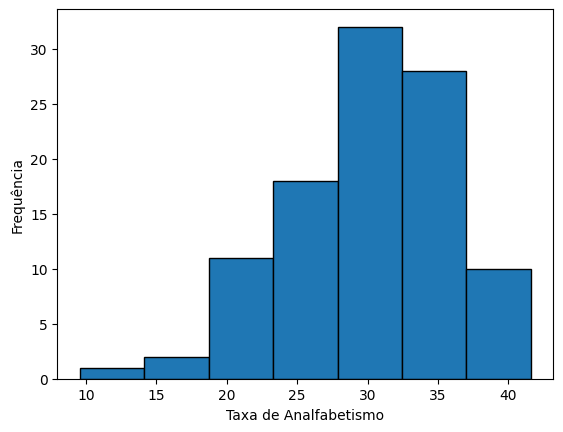

In [29]:
plt.hist(al.analf, bins=7, align='left', histtype='bar', edgecolor='black')
plt.title("")  # Título do histograma
plt.xlabel("Taxa de Analfabetismo")  # Rótulo do eixo x
plt.ylabel("Frequência")  # Rótulo do eixo y

plt.show()  # Exibe o histograma

In [30]:
percentis = [0, 5, 50, 100]

perce = np.percentile(al.analf, percentis)
pcts = pd.DataFrame({"Percentis": percentis, "Valores": perce})
round(pcts, 2)

,Percentis,Valores
0,0,11.86
1,5,22.47
2,50,32.33
3,100,43.89


### Questão 2 letra c) Criação de variável categórica para analfabetismo

In [31]:
percentis = [0, 5, 50, 100]

perce = np.percentile(al.analf, percentis)
pcts = pd.DataFrame({"Percentis": percentis, "Valores": perce})
round(pcts, 2)

,Percentis,Valores
0,0,11.86
1,5,22.47
2,50,32.33
3,100,43.89


In [32]:
perce[1]

22.469

In [33]:
# criação da variável sitanalf
al['sitanalf'] = ''
al.loc[al['analf'] <= perce[1], 'sitanalf'] = "bom"
al.loc[(al['analf'] > perce[1]) & (al['analf'] <= perce[2]), 'sitanalf'] = "regular"
al.loc[(al['analf'] > perce[2]), 'sitanalf'] = "ruim"
al

,ano,uf,codmun,munic,analf,pobre,rpc,agua,lixo,esgag_inad,poprur,poptot,popurb,sitanalf
7214,2010,27,2700102,ÁGUA BRANCA,30.92,52.87,213.00,61.78,97.94,36.29,14276,19377,5101,regular
7215,2010,27,2700201,ANADIA,36.16,47.59,239.53,61.62,99.15,11.06,8475,17424,8949,ruim
7216,2010,27,2700300,ARAPIRACA,22.45,26.65,423.28,94.68,97.38,12.38,32525,214006,181481,bom
7217,2010,27,2700409,ATALAIA,33.57,42.73,237.33,82.49,95.31,18.19,21865,44322,22457,ruim
7218,2010,27,2700508,BARRA DE SANTO ANTÔNIO,27.94,44.24,247.81,91.16,93.66,2.74,988,14230,13242,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,2010,27,2709103,TAQUARANA,37.95,49.78,215.16,74.19,95.94,34.31,11706,19020,7314,ruim
7312,2010,27,2709152,TEOTÔNIO VILELA,28.87,42.79,244.39,83.78,98.38,8.06,6367,41152,34785,regular
7313,2010,27,2709202,TRAIPU,42.69,63.39,178.79,37.18,82.18,38.60,17675,25702,8027,ruim
7314,2010,27,2709301,UNIÃO DOS PALMARES,31.62,36.82,313.92,90.57,97.46,5.68,14707,62358,47651,regular


### Questão 2 letra d) Análise da sifanalf

In [34]:
# Top 5 melhores
al[(al.sitanalf == 'bom')].head(5)

,ano,uf,codmun,munic,analf,pobre,rpc,agua,lixo,esgag_inad,poprur,poptot,popurb,sitanalf
7216,2010,27,2700300,ARAPIRACA,22.45,26.65,423.28,94.68,97.38,12.38,32525,214006,181481,bom
7260,2010,27,2704302,MACEIÓ,11.86,15.57,792.54,80.17,97.74,2.32,619,932748,932129,bom
7264,2010,27,2704708,MARECHAL DEODORO,21.90,32.01,431.43,97.25,94.74,4.89,2585,45977,43392,bom
7296,2010,27,2707701,RIO LARGO,18.28,24.26,369.11,77.58,88.92,5.50,12534,68481,55947,bom
7305,2010,27,2708600,SÃO MIGUEL DOS CAMPOS,21.28,28.11,360.82,96.16,99.31,1.33,2011,54577,52566,bom


In [35]:
# Top 5 piores
al[(al.sitanalf == 'ruim')].head(5)

,ano,uf,codmun,munic,analf,pobre,rpc,agua,lixo,esgag_inad,poprur,poptot,popurb,sitanalf
7215,2010,27,2700201,ANADIA,36.16,47.59,239.53,61.62,99.15,11.06,8475,17424,8949,ruim
7217,2010,27,2700409,ATALAIA,33.57,42.73,237.33,82.49,95.31,18.19,21865,44322,22457,ruim
7221,2010,27,2700805,BELÉM,33.33,37.05,309.50,62.16,92.54,30.81,2679,4551,1872,ruim
7222,2010,27,2700904,BELO MONTE,38.11,60.98,187.77,40.13,99.16,17.30,5859,7030,1171,ruim
7224,2010,27,2701100,BRANQUINHA,41.58,40.52,221.93,81.68,97.83,17.15,3910,10583,6673,ruim


### Questão 2 letra e) Criando variável de faixa populacional

In [36]:
al['fxpop'] = ''
al.loc[al['poptot'] <= 5000, 'fxpop'] = 1
al.loc[(al['poptot'] > 5000) & (al['poptot'] <= 20000), 'fxpop'] = 2
al.loc[(al['poptot'] > 20000) & (al['poptot'] <= 50000), 'fxpop'] = 3
al.loc[(al['poptot'] > 50000) & (al['poptot'] <= 100000), 'fxpop'] = 4
al.loc[al['poptot'] > 100000, 'fxpop'] = 5
al.head(5)

,ano,uf,codmun,munic,analf,pobre,rpc,agua,lixo,esgag_inad,poprur,poptot,popurb,sitanalf,fxpop
7214,2010,27,2700102,ÁGUA BRANCA,30.92,52.87,213.00,61.78,97.94,36.29,14276,19377,5101,regular,2
7215,2010,27,2700201,ANADIA,36.16,47.59,239.53,61.62,99.15,11.06,8475,17424,8949,ruim,2
7216,2010,27,2700300,ARAPIRACA,22.45,26.65,423.28,94.68,97.38,12.38,32525,214006,181481,bom,5
7217,2010,27,2700409,ATALAIA,33.57,42.73,237.33,82.49,95.31,18.19,21865,44322,22457,ruim,3
7218,2010,27,2700508,BARRA DE SANTO ANTÔNIO,27.94,44.24,247.81,91.16,93.66,2.74,988,14230,13242,regular,2


### Questão 2 letra f) Tabulação cruzada entre sitanalf e fxpop


In [37]:
cross = pd.crosstab(al['sitanalf'], al['fxpop'])
popcross = cross.apply(lambda r: r/r.sum(), axis=1) * 100
popcross = popcross.round(2)
popcross

fxpop,1,2,3,4,5
sitanalf,,,,,
bom,0.00,16.67,16.67,33.33,33.33
regular,2.22,55.56,31.11,11.11,0.00
ruim,9.80,58.82,31.37,0.00,0.00


### Questão 2 g) Estatística descritiva da variável pobre por faixa populacional


In [38]:
pobrepop = al.groupby('fxpop')['pobre']
pobrepop = pd.DataFrame(pobrepop.describe())
pobrepop

,count,mean,std,min,25%,50%,75%,max
fxpop,,,,,,,,
1,6.0,45.330000,10.980789,37.05,38.9775,42.57,44.490,66.88
2,56.0,48.279107,9.060028,23.89,44.0675,48.71,53.205,67.57
3,31.0,46.238710,7.806200,32.01,41.5750,45.62,51.060,63.39
4,7.0,33.455714,6.425239,24.26,29.4150,33.79,36.820,43.67
5,2.0,21.110000,7.834743,15.57,18.3400,21.11,23.880,26.65


In [39]:
# adição do coeficiente de variação
pobrepop['CV'] = (pobrepop['std']/pobrepop['mean'])*100
pobrepop

,count,mean,std,min,25%,50%,75%,max,CV
fxpop,,,,,,,,,
1,6.0,45.330000,10.980789,37.05,38.9775,42.57,44.490,66.88,24.224109
2,56.0,48.279107,9.060028,23.89,44.0675,48.71,53.205,67.57,18.765940
3,31.0,46.238710,7.806200,32.01,41.5750,45.62,51.060,63.39,16.882392
4,7.0,33.455714,6.425239,24.26,29.4150,33.79,36.820,43.67,19.205206
5,2.0,21.110000,7.834743,15.57,18.3400,21.11,23.880,26.65,37.113895


Text(0, 0.5, 'População')

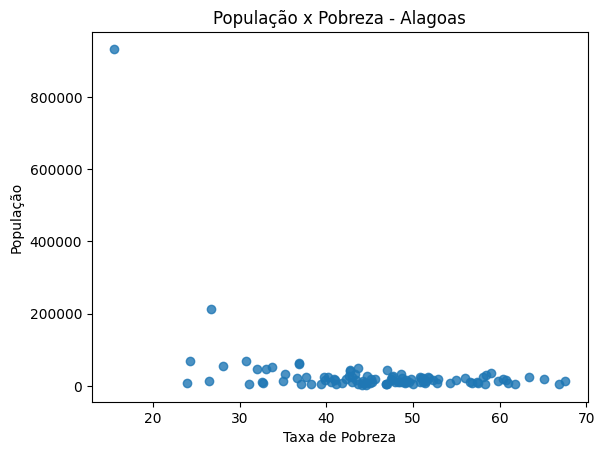

In [40]:
pobreg = sns.regplot(x=al.pobre,
            y=al.poptot,
            data=al,
            fit_reg=False)
pobreg.set_title('População x Pobreza - Alagoas')
pobreg.set_xlabel('Taxa de Pobreza')
pobreg.set_ylabel('População')

In [41]:
alsem_mcz = al[(al.poptot <= 900000)]
alsem_mcz

,ano,uf,codmun,munic,analf,pobre,rpc,agua,lixo,esgag_inad,poprur,poptot,popurb,sitanalf,fxpop
7214,2010,27,2700102,ÁGUA BRANCA,30.92,52.87,213.00,61.78,97.94,36.29,14276,19377,5101,regular,2
7215,2010,27,2700201,ANADIA,36.16,47.59,239.53,61.62,99.15,11.06,8475,17424,8949,ruim,2
7216,2010,27,2700300,ARAPIRACA,22.45,26.65,423.28,94.68,97.38,12.38,32525,214006,181481,bom,5
7217,2010,27,2700409,ATALAIA,33.57,42.73,237.33,82.49,95.31,18.19,21865,44322,22457,ruim,3
7218,2010,27,2700508,BARRA DE SANTO ANTÔNIO,27.94,44.24,247.81,91.16,93.66,2.74,988,14230,13242,regular,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,2010,27,2709103,TAQUARANA,37.95,49.78,215.16,74.19,95.94,34.31,11706,19020,7314,ruim,2
7312,2010,27,2709152,TEOTÔNIO VILELA,28.87,42.79,244.39,83.78,98.38,8.06,6367,41152,34785,regular,3
7313,2010,27,2709202,TRAIPU,42.69,63.39,178.79,37.18,82.18,38.60,17675,25702,8027,ruim,3
7314,2010,27,2709301,UNIÃO DOS PALMARES,31.62,36.82,313.92,90.57,97.46,5.68,14707,62358,47651,regular,4


Text(0, 0.5, 'População')

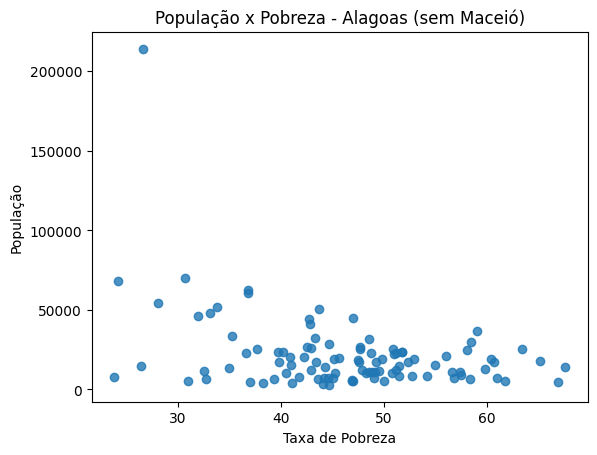

In [42]:
pobregsem_mcz = sns.regplot(x=alsem_mcz.pobre,
            y=alsem_mcz.poptot,
            data=alsem_mcz,
            fit_reg=False)
pobregsem_mcz.set_title('População x Pobreza - Alagoas (sem Maceió)')
pobregsem_mcz.set_xlabel('Taxa de Pobreza')
pobregsem_mcz.set_ylabel('População')

In [43]:
alsem_ara_e_mcz = al[(al.poptot <= 200000)]
alsem_ara_e_mcz

,ano,uf,codmun,munic,analf,pobre,rpc,agua,lixo,esgag_inad,poprur,poptot,popurb,sitanalf,fxpop
7214,2010,27,2700102,ÁGUA BRANCA,30.92,52.87,213.00,61.78,97.94,36.29,14276,19377,5101,regular,2
7215,2010,27,2700201,ANADIA,36.16,47.59,239.53,61.62,99.15,11.06,8475,17424,8949,ruim,2
7217,2010,27,2700409,ATALAIA,33.57,42.73,237.33,82.49,95.31,18.19,21865,44322,22457,ruim,3
7218,2010,27,2700508,BARRA DE SANTO ANTÔNIO,27.94,44.24,247.81,91.16,93.66,2.74,988,14230,13242,regular,2
7219,2010,27,2700607,BARRA DE SÃO MIGUEL,23.71,23.89,422.78,90.49,100.00,1.50,1053,7574,6521,regular,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,2010,27,2709103,TAQUARANA,37.95,49.78,215.16,74.19,95.94,34.31,11706,19020,7314,ruim,2
7312,2010,27,2709152,TEOTÔNIO VILELA,28.87,42.79,244.39,83.78,98.38,8.06,6367,41152,34785,regular,3
7313,2010,27,2709202,TRAIPU,42.69,63.39,178.79,37.18,82.18,38.60,17675,25702,8027,ruim,3
7314,2010,27,2709301,UNIÃO DOS PALMARES,31.62,36.82,313.92,90.57,97.46,5.68,14707,62358,47651,regular,4


Text(0, 0.5, 'População')

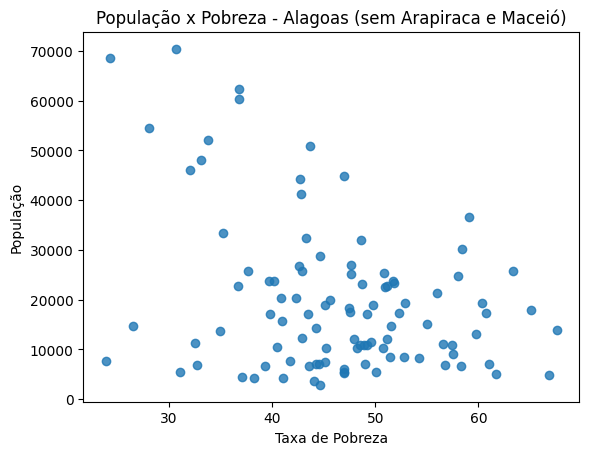

In [44]:
pobregsem_ara_e_mcz = sns.regplot(x=alsem_ara_e_mcz.pobre,
            y=alsem_ara_e_mcz.poptot,
            data=alsem_ara_e_mcz,
            fit_reg=False)
pobregsem_ara_e_mcz.set_title('População x Pobreza - Alagoas (sem Arapiraca e Maceió)')
pobregsem_ara_e_mcz.set_xlabel('Taxa de Pobreza')
pobregsem_ara_e_mcz.set_ylabel('População')

### Questão 2 h) Box plot de pobreza por faixa populacional

Text(0, 0.5, 'Taxa de Pobreza')

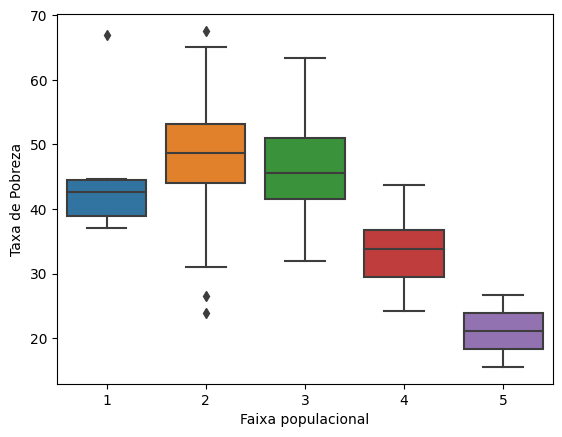

In [45]:
boxplot = sns.boxplot(x='fxpop', y='pobre', data=al)
boxplot.set_xlabel('Faixa populacional')
boxplot.set_ylabel('Taxa de Pobreza')

## Questão 2) i) Criação de variável de urbanização

In [46]:
al['urb'] = (al.popurb/al.poptot)*100
al['rur'] = (al.poprur/al.poptot)*100
al.head(5)

,ano,uf,codmun,munic,analf,pobre,rpc,agua,lixo,esgag_inad,poprur,poptot,popurb,sitanalf,fxpop,urb,rur
7214,2010,27,2700102,ÁGUA BRANCA,30.92,52.87,213.00,61.78,97.94,36.29,14276,19377,5101,regular,2,26.325025,73.674975
7215,2010,27,2700201,ANADIA,36.16,47.59,239.53,61.62,99.15,11.06,8475,17424,8949,ruim,2,51.360193,48.639807
7216,2010,27,2700300,ARAPIRACA,22.45,26.65,423.28,94.68,97.38,12.38,32525,214006,181481,bom,5,84.801828,15.198172
7217,2010,27,2700409,ATALAIA,33.57,42.73,237.33,82.49,95.31,18.19,21865,44322,22457,ruim,3,50.667840,49.332160
7218,2010,27,2700508,BARRA DE SANTO ANTÔNIO,27.94,44.24,247.81,91.16,93.66,2.74,988,14230,13242,regular,2,93.056922,6.943078


## Questão 2 letra j) Regressão com pobre como variável dependete


In [47]:
# Definindo as variáveis dependentes e independetes
y = al.pobre
x = al.urb
x = sm.add_constant(x)

In [48]:
reg = sm.OLS(y, x).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  pobre   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     123.1
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           4.00e-19
Time:                        05:14:45   Log-Likelihood:                -337.10
No. Observations:                 102   AIC:                             678.2
Df Residuals:                     100   BIC:                             683.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2892      1.781     36.102      0.0

## Questão 2 k) Gerando os resíduos e fazendo o teste de Jarque-Bera

(array([ 6.,  7., 14., 24., 26., 18.,  6.,  1.]),
 array([-16.41437623, -12.12628864,  -7.83820106,  -3.55011347,
          0.73797411,   5.02606169,   9.31414928,  13.60223686,
         17.89032445]),
 <BarContainer object of 8 artists>)

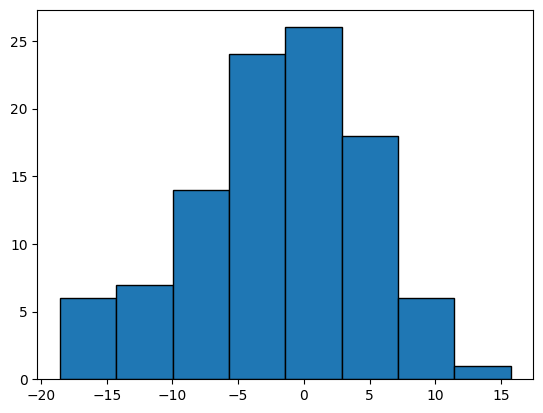

In [49]:
# k.1) Gerando os resíduos
resid = reg.resid
plt.hist(resid, bins=8, align='left', histtype='bar', edgecolor='black')

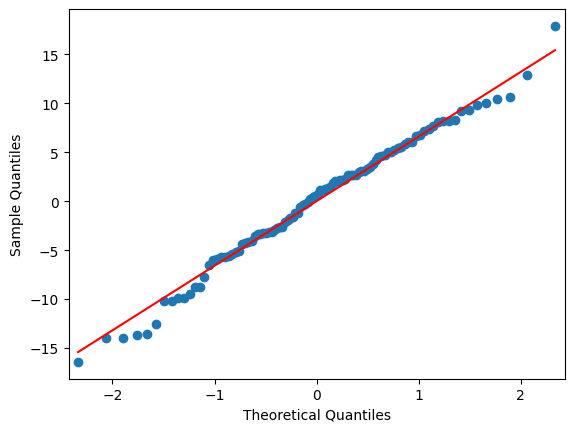

In [50]:
sm.qqplot(resid, line='s');

In [51]:
jb_value, p_value, skew, kurtosis = sm.stats.jarque_bera(resid)
jb = np.array([jb_value, p_value, skew, kurtosis])
jb[0]

0.8252003188849905

In [52]:
# k.2) Teste de Jarque-Bera
jbresult = pd.DataFrame({"Estatística de Jarque-Bera": jb[0], "Valor p": jb[1]}, index=[0])
jbresult

,Estatística de Jarque-Bera,Valor p
0,0.8252,0.661927
